Dimensionality Reduction Comparison
---
#### Method Testing
##### May 2019


Using discrete (`inputs/GSM1626793_P14Retina_1.digital_expression.csv.gz`, Mocosko, _et al_ 2015) and continuous (`inputs/qi_s1_edited_all.csv.gz`) datasets, downsample and feature select, then perform various DR techniques and compare the following:
* __Euclidean cell-cell distance__ correlations before and after transformation/reduction
* __Kullback-Leibler Divergence (KLD)__ explaining the Shannon entropy of the difference between the cumulative probability distributions of unique, normalized cell-cell distances.
* __K-nearest neighbor (Knn)__ preservation

In [85]:
import sys
sys.path.append('../')
from fcc_DRs import *
%matplotlib inline

---
#### Read in discrete dataset

In [2]:
P14Retina_0 = RNA_counts.from_file('../inputs/GSM1626793_P14Retina_1.processed.tsv', cells_axis=0, labels=[0,0])

In [3]:
# print cells x genes
P14Retina_0.data.shape

(1326, 500)

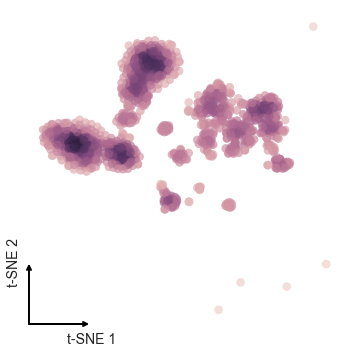

CPU times: user 17.5 s, sys: 112 ms, total: 17.7 s
Wall time: 17.6 s


In [4]:
%%time 
P14Retina_tSNE_05 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=5, seed=18) 
P14Retina_tSNE_05.plot()

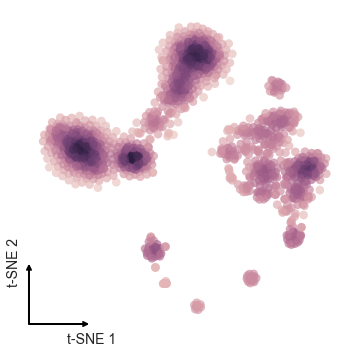

CPU times: user 16.6 s, sys: 89.3 ms, total: 16.7 s
Wall time: 16.5 s


In [5]:
%%time 
P14Retina_tSNE_10 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=10, seed=18) 
P14Retina_tSNE_10.plot()

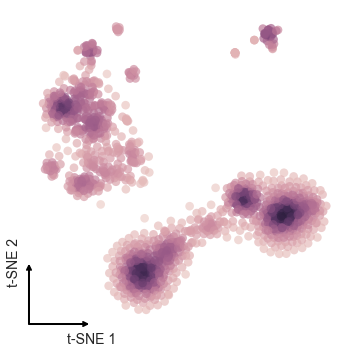

CPU times: user 18.7 s, sys: 264 ms, total: 19 s
Wall time: 18.9 s


In [6]:
%%time 
P14Retina_tSNE_30 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=30, seed=1) # use standard perplexity of 30 here
P14Retina_tSNE_30.plot()

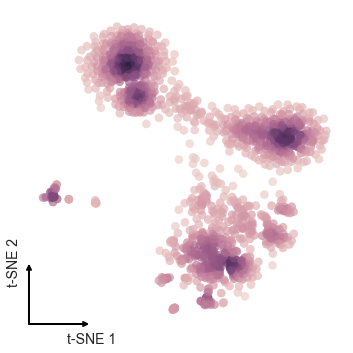

CPU times: user 23.5 s, sys: 856 ms, total: 24.3 s
Wall time: 24.3 s


In [7]:
%%time 
P14Retina_tSNE_70 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=70, seed=18) 
P14Retina_tSNE_70.plot()

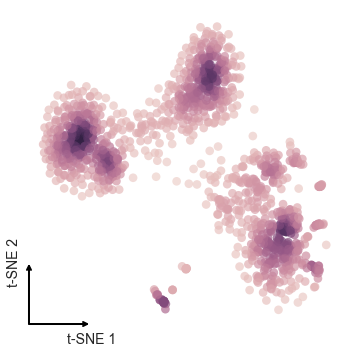

CPU times: user 26.4 s, sys: 1.16 s, total: 27.5 s
Wall time: 27.5 s


In [8]:
%%time 
P14Retina_tSNE_100 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=100, seed=18) 
P14Retina_tSNE_100.plot()

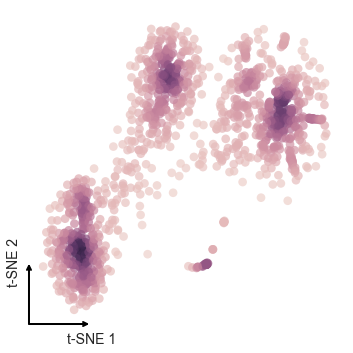

CPU times: user 35.8 s, sys: 1.77 s, total: 37.5 s
Wall time: 37.6 s


In [9]:
%%time 
P14Retina_tSNE_200 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=200, seed=18) 
P14Retina_tSNE_200.plot()

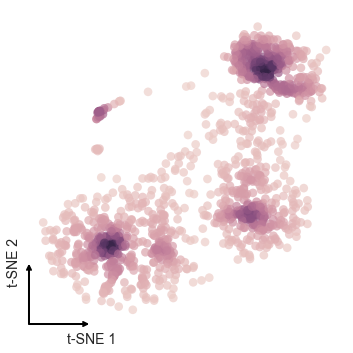

CPU times: user 44.5 s, sys: 2.62 s, total: 47.1 s
Wall time: 46.9 s


In [10]:
%%time 
P14Retina_tSNE_500 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=500, seed=18) 
P14Retina_tSNE_500.plot()

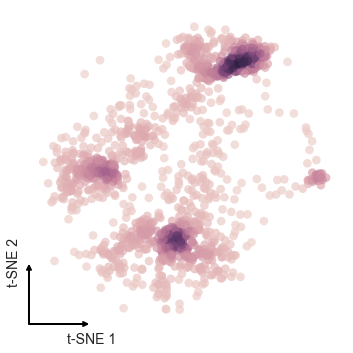

CPU times: user 46.6 s, sys: 2.87 s, total: 49.4 s
Wall time: 49.2 s


In [11]:
%%time 
P14Retina_tSNE_1000 = fcc_tSNE(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=18) 
P14Retina_tSNE_1000.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

In [12]:
# create dictionaries for dumping results into
final_distance_stats = {'t-SNE':{'Retina':{'Perplexity':{}, 'R':{}, 'EMD':{}, 'Knn Pres.':{}}, 'Colon':{'Perplexity':{}, 'R':{}, 'EMD':{}, 'Knn Pres.':{}}},
                        'UMAP':{'Retina':{'Perplexity':{}, 'R':{}, 'EMD':{}, 'Knn Pres.':{}}, 'Colon':{'Perplexity':{}, 'R':{}, 'EMD':{}, 'Knn Pres.':{}}}}

In [13]:
k = 30 # choose value for K-nearest neighbor calculations

R: 0.685
EMD: 0.3747
KLD: 0.1211
Knn Pres.: 96.5272
CPU times: user 37.5 s, sys: 5.98 s, total: 43.5 s
Wall time: 43.5 s


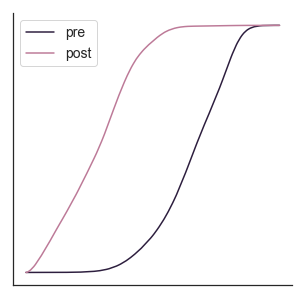

<Figure size 504x504 with 0 Axes>

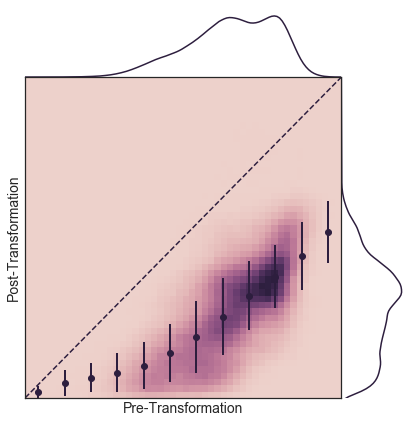

In [14]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_05.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_05.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 5'] = 5
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 5'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 5'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.7087
EMD: 0.2478
KLD: 0.1246
Knn Pres.: 96.6162
CPU times: user 39 s, sys: 6.64 s, total: 45.6 s
Wall time: 46 s


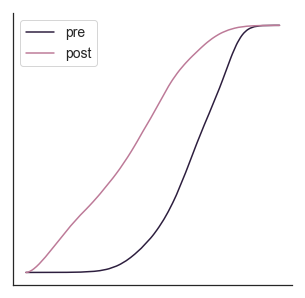

<Figure size 504x504 with 0 Axes>

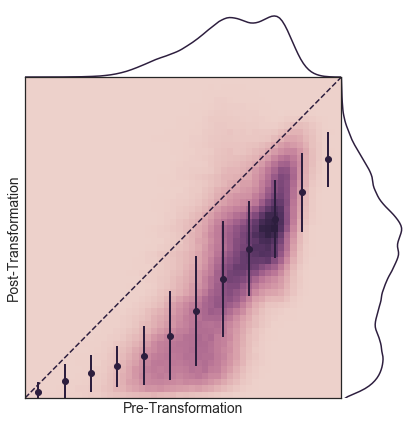

In [15]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_10.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_10.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 10'] = 10
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 10'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 10'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.7739
EMD: 0.2165
KLD: 0.1366
Knn Pres.: 96.8218
CPU times: user 39.4 s, sys: 6.55 s, total: 45.9 s
Wall time: 46.3 s


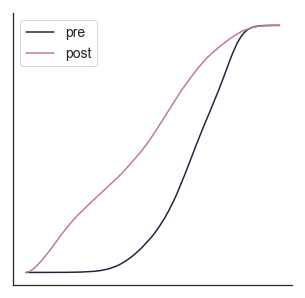

<Figure size 504x504 with 0 Axes>

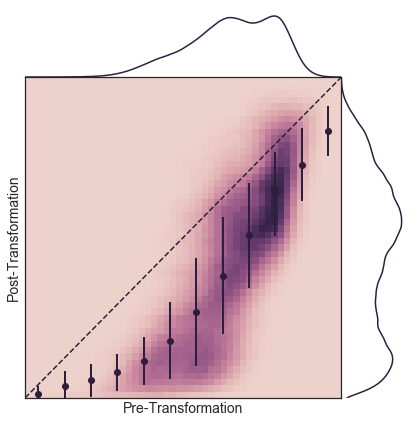

In [16]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_30.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_30.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 30'] = 30
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 30'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 30'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.7969
EMD: 0.254
KLD: 0.137
Knn Pres.: 97.0178
CPU times: user 38 s, sys: 6.41 s, total: 44.4 s
Wall time: 44.6 s


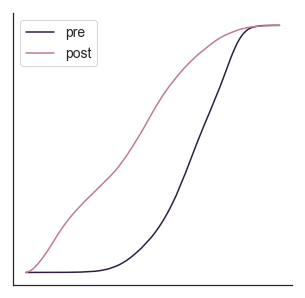

<Figure size 504x504 with 0 Axes>

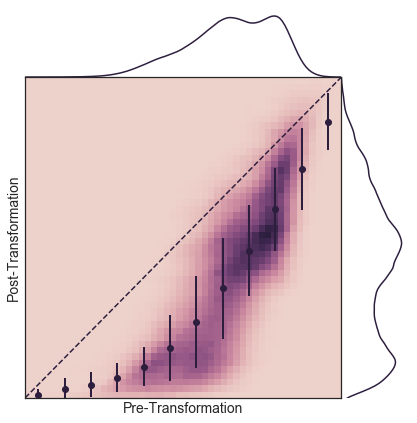

In [17]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_70.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_70.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 70'] = 70
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 70'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 70'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.8006
EMD: 0.2618
KLD: 0.1409
Knn Pres.: 97.13
CPU times: user 37.6 s, sys: 6.25 s, total: 43.9 s
Wall time: 43.9 s


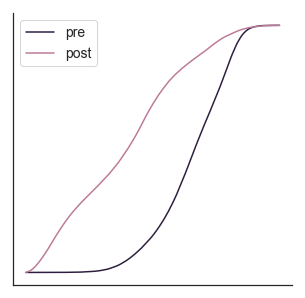

<Figure size 504x504 with 0 Axes>

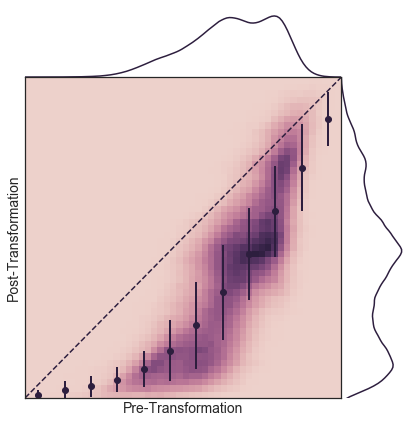

In [18]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_100.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_100.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 100'] = 100
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 100'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 100'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.8135
EMD: 0.2713
KLD: 0.1457
Knn Pres.: 97.2968
CPU times: user 37.8 s, sys: 6.33 s, total: 44.2 s
Wall time: 44.2 s


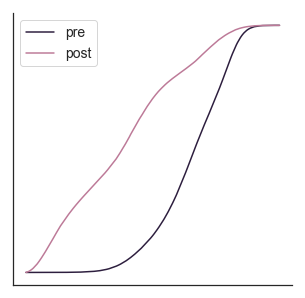

<Figure size 504x504 with 0 Axes>

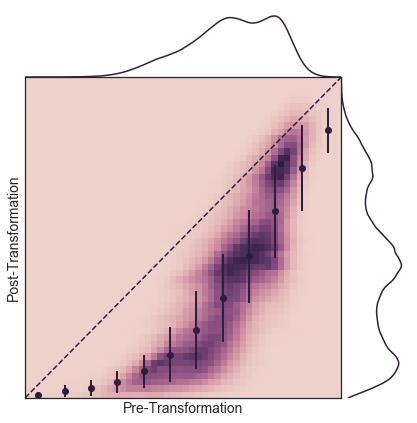

In [19]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_200.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_200.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 200'] = 200
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 200'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 200'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.8521
EMD: 0.2708
KLD: 0.136
Knn Pres.: 97.6485
CPU times: user 37.9 s, sys: 6.29 s, total: 44.2 s
Wall time: 44.2 s


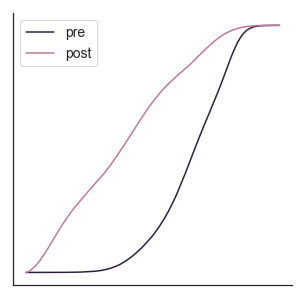

<Figure size 504x504 with 0 Axes>

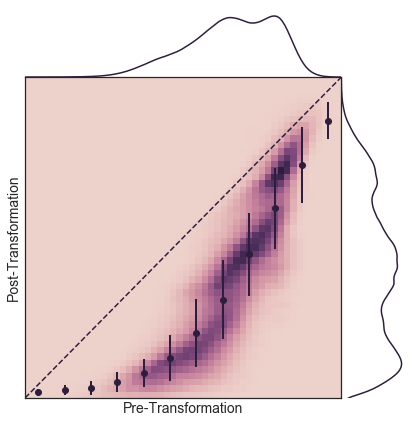

In [20]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_500.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 500'] = 500
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 500'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 500'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.8886
EMD: 0.267
KLD: 0.1223
Knn Pres.: 97.9462
CPU times: user 38.2 s, sys: 6.51 s, total: 44.7 s
Wall time: 44.9 s


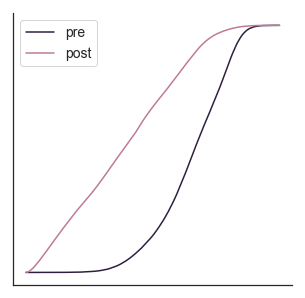

<Figure size 504x504 with 0 Axes>

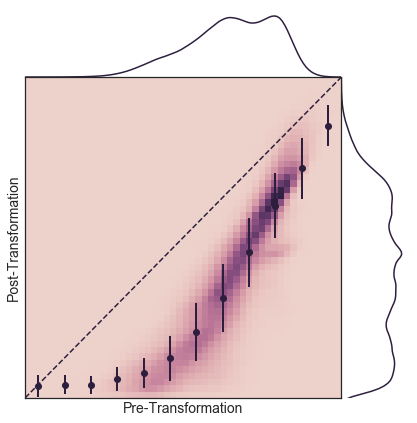

In [21]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_tSNE_1000.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_tSNE_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Retina']['Perplexity']['t-SNE 1000'] = 1000
final_distance_stats['t-SNE']['Retina']['R']['t-SNE 1000'], final_distance_stats['t-SNE']['Retina']['EMD']['t-SNE 1000'], final_distance_stats['t-SNE']['Retina']['Knn Pres.']['t-SNE 1000'] = mantel_stats[0], EMD, KLD, knn

---
Now do the same thing with UMAP

/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components
/Users/cody/.virtualenvs/lau_lab/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 2 separate connected components using meta-embedding (experimental)
  n_components


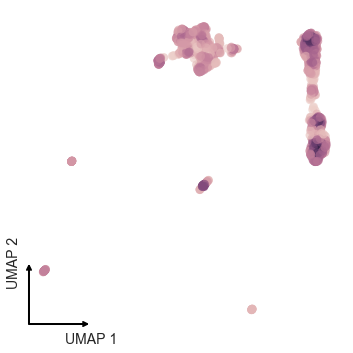

CPU times: user 8.16 s, sys: 380 ms, total: 8.54 s
Wall time: 8.17 s


In [22]:
%%time 
P14Retina_UMAP_05 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=5, seed=1) 
P14Retina_UMAP_05.plot()

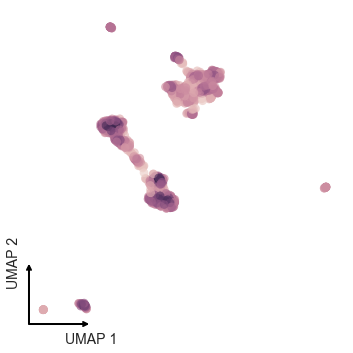

CPU times: user 4.71 s, sys: 370 ms, total: 5.08 s
Wall time: 4.61 s


In [23]:
%%time 
P14Retina_UMAP_10 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=10, seed=1) 
P14Retina_UMAP_10.plot()

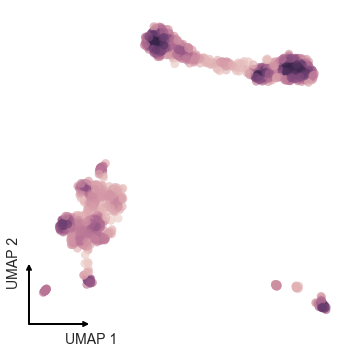

CPU times: user 6.58 s, sys: 375 ms, total: 6.95 s
Wall time: 6.45 s


In [24]:
%%time 
P14Retina_UMAP_30 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=30, seed=1) # use standard perplexity of 30 here
P14Retina_UMAP_30.plot()

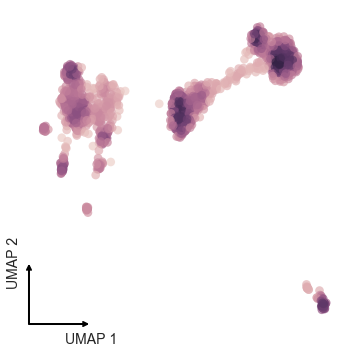

CPU times: user 8 s, sys: 411 ms, total: 8.41 s
Wall time: 7.95 s


In [25]:
%%time 
P14Retina_UMAP_70 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=70, seed=1) 
P14Retina_UMAP_70.plot()

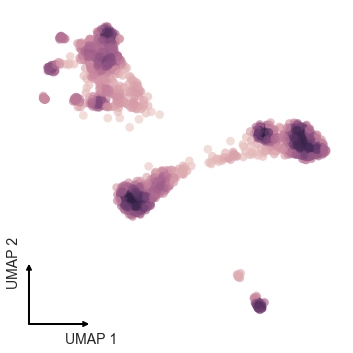

CPU times: user 9.43 s, sys: 355 ms, total: 9.78 s
Wall time: 9.26 s


In [26]:
%%time 
P14Retina_UMAP_100 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=100, seed=1) 
P14Retina_UMAP_100.plot()

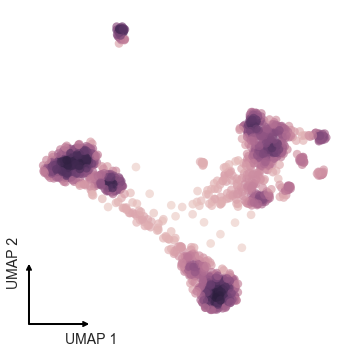

CPU times: user 9.99 s, sys: 374 ms, total: 10.4 s
Wall time: 9.82 s


In [27]:
%%time 
P14Retina_UMAP_200 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=200, seed=1) 
P14Retina_UMAP_200.plot()

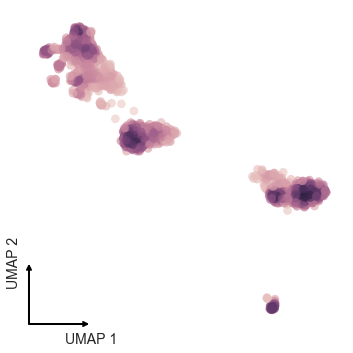

CPU times: user 12 s, sys: 432 ms, total: 12.4 s
Wall time: 11.9 s


In [28]:
%%time 
P14Retina_UMAP_500 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=500, seed=1) 
P14Retina_UMAP_500.plot()

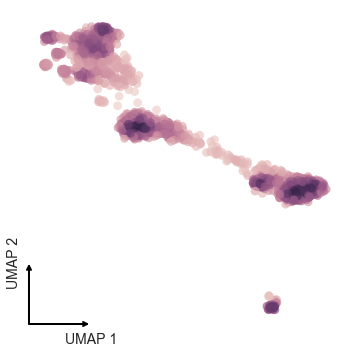

CPU times: user 13.7 s, sys: 576 ms, total: 14.2 s
Wall time: 13.7 s


In [29]:
%%time 
P14Retina_UMAP_1000 = fcc_UMAP(P14Retina_0.arcsinh_norm(), perplexity=1000, seed=1) 
P14Retina_UMAP_1000.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.5933
EMD: 0.3679
KLD: 0.2602
Knn Pres.: 96.5569
CPU times: user 37.8 s, sys: 6.21 s, total: 44 s
Wall time: 44.1 s


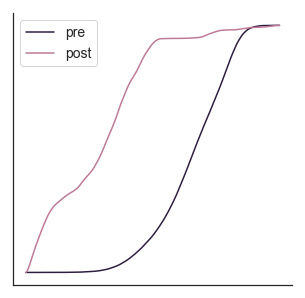

<Figure size 504x504 with 0 Axes>

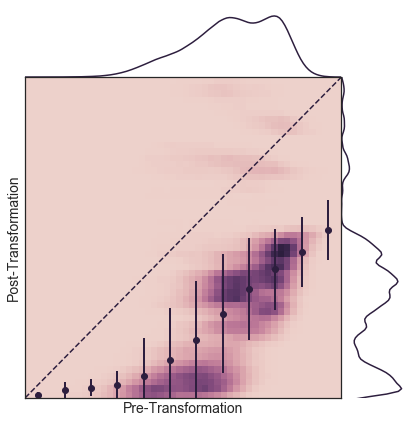

In [30]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_05.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_05.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 5'] = 5
final_distance_stats['UMAP']['Retina']['R']['UMAP 5'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 5'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.6648
EMD: 0.3894
KLD: 0.2476
Knn Pres.: 96.6038
CPU times: user 38.2 s, sys: 6.52 s, total: 44.7 s
Wall time: 44.8 s


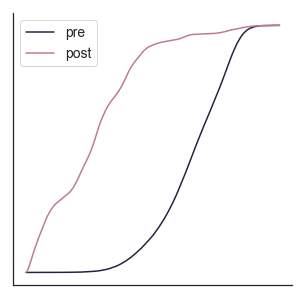

<Figure size 504x504 with 0 Axes>

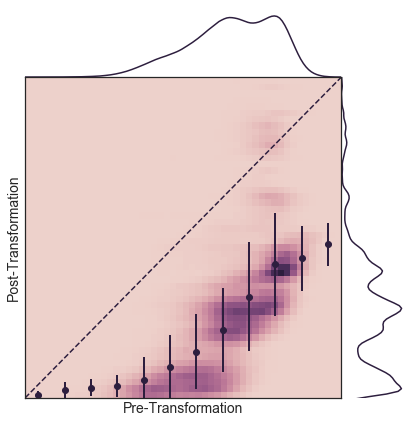

In [31]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_10.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_10.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 10'] = 10
final_distance_stats['UMAP']['Retina']['R']['UMAP 10'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 10'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.7269
EMD: 0.2247
KLD: 0.2474
Knn Pres.: 96.6672
CPU times: user 38.2 s, sys: 6.58 s, total: 44.8 s
Wall time: 44.8 s


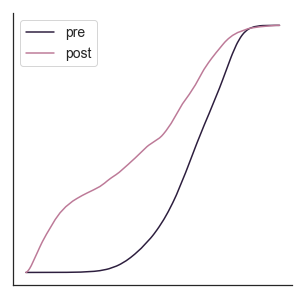

<Figure size 504x504 with 0 Axes>

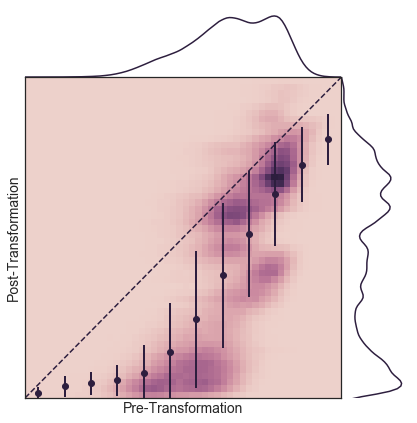

In [32]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_30.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_30.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 30'] = 30
final_distance_stats['UMAP']['Retina']['R']['UMAP 30'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 30'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.755
EMD: 0.2934
KLD: 0.247
Knn Pres.: 96.6515
CPU times: user 39.1 s, sys: 6.58 s, total: 45.7 s
Wall time: 45.9 s


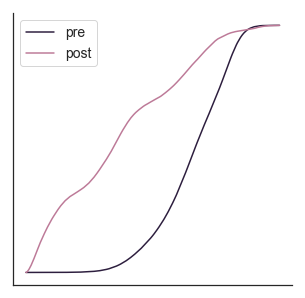

<Figure size 504x504 with 0 Axes>

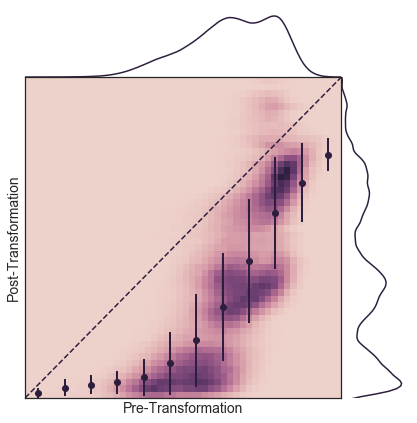

In [33]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_70.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_70.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 70'] = 70
final_distance_stats['UMAP']['Retina']['R']['UMAP 70'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 70'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.7824
EMD: 0.2779
KLD: 0.185
Knn Pres.: 96.6534
CPU times: user 37.6 s, sys: 6.23 s, total: 43.8 s
Wall time: 43.8 s


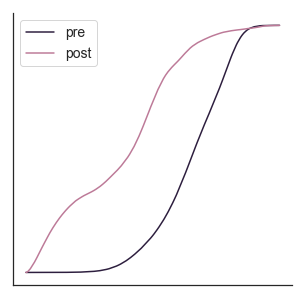

<Figure size 504x504 with 0 Axes>

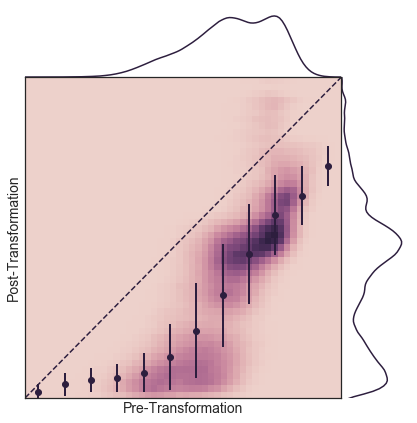

In [34]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_100.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_100.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 100'] = 100
final_distance_stats['UMAP']['Retina']['R']['UMAP 100'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 100'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.771
EMD: 0.2466
KLD: 0.1576
Knn Pres.: 96.6763
CPU times: user 37.6 s, sys: 6.2 s, total: 43.8 s
Wall time: 43.8 s


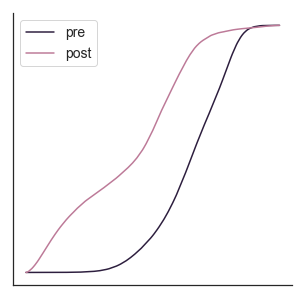

<Figure size 504x504 with 0 Axes>

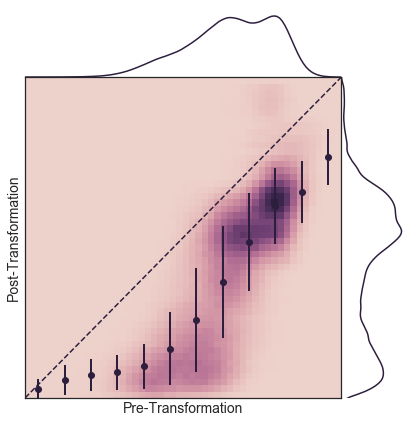

In [35]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_200.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_200.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 200'] = 200
final_distance_stats['UMAP']['Retina']['R']['UMAP 200'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 200'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.7678
EMD: 0.2759
KLD: 0.2785
Knn Pres.: 96.6613
CPU times: user 37.6 s, sys: 6.24 s, total: 43.8 s
Wall time: 43.9 s


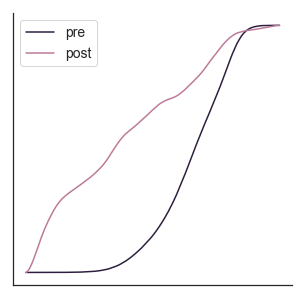

<Figure size 504x504 with 0 Axes>

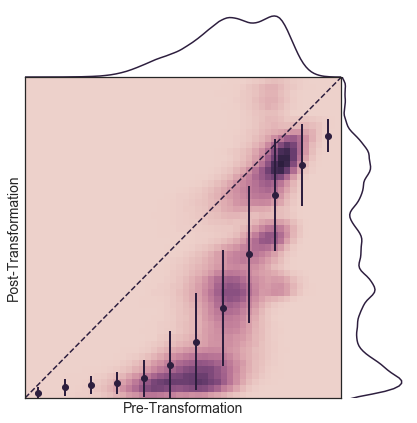

In [36]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_500.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_500.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 500'] = 500
final_distance_stats['UMAP']['Retina']['R']['UMAP 500'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 500'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.764
EMD: 0.3286
KLD: 0.2421
Knn Pres.: 96.6667
CPU times: user 38.1 s, sys: 6.53 s, total: 44.6 s
Wall time: 44.7 s


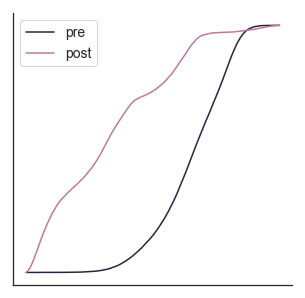

<Figure size 504x504 with 0 Axes>

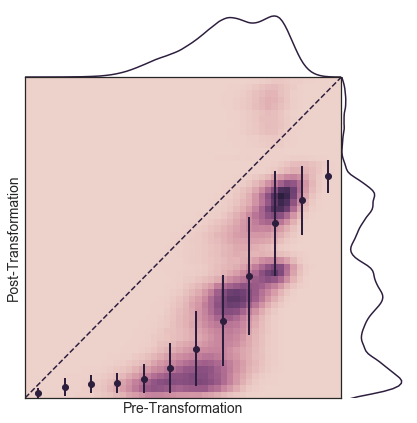

In [37]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=P14Retina_0.distance_matrix(transform='arcsinh'), post=P14Retina_UMAP_1000.distance_matrix())
knn = knn_preservation(pre=P14Retina_0.knn_graph(k, transform='arcsinh'), post=P14Retina_UMAP_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Retina']['Perplexity']['UMAP 1000'] = 1000
final_distance_stats['UMAP']['Retina']['R']['UMAP 1000'], final_distance_stats['UMAP']['Retina']['EMD']['UMAP 1000'], final_distance_stats['UMAP']['Retina']['Knn Pres.']['UMAP 1000'] = mantel_stats[0], EMD, KLD, knn

---
## Colon Dataset

In [38]:
%time qi = RNA_counts.from_file('../inputs/GSM2743164_rep1_colon_rnaseq.processed.tsv', cells_axis=0, labels=[0,0])

CPU times: user 115 ms, sys: 16.9 ms, total: 132 ms
Wall time: 148 ms


In [39]:
# cells x genes
qi.data.shape

(1117, 500)

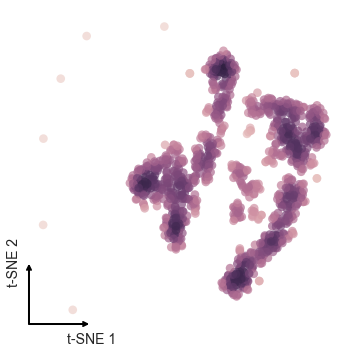

CPU times: user 13.7 s, sys: 148 ms, total: 13.9 s
Wall time: 13.9 s


In [40]:
%%time 
qi_tSNE_05 = fcc_tSNE(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_tSNE_05.plot()

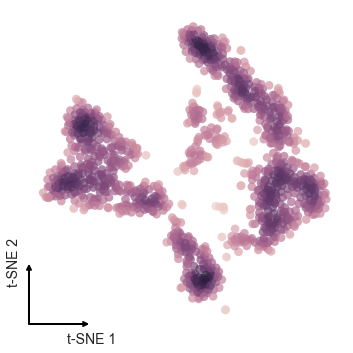

CPU times: user 13.5 s, sys: 142 ms, total: 13.6 s
Wall time: 13.6 s


In [41]:
%%time 
qi_tSNE_10 = fcc_tSNE(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_tSNE_10.plot()

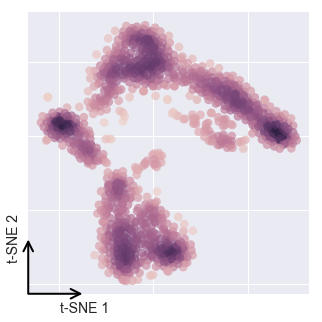

CPU times: user 14.6 s, sys: 113 ms, total: 14.7 s
Wall time: 14.6 s


In [84]:
%%time 
qi_tSNE_30 = fcc_tSNE(qi.arcsinh_norm(), perplexity=30, seed=1)
qi_tSNE_30.plot()

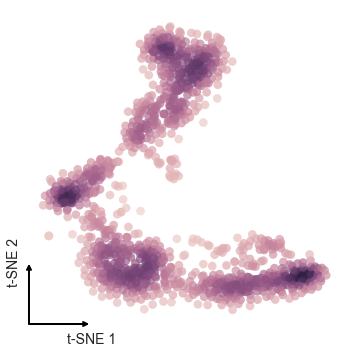

CPU times: user 17.3 s, sys: 446 ms, total: 17.7 s
Wall time: 17.6 s


In [43]:
%%time 
qi_tSNE_70 = fcc_tSNE(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_tSNE_70.plot()

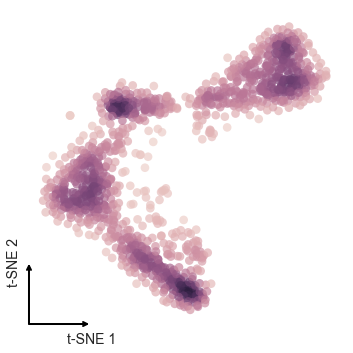

CPU times: user 19.3 s, sys: 604 ms, total: 19.9 s
Wall time: 2min 45s


In [44]:
%%time 
qi_tSNE_100 = fcc_tSNE(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_tSNE_100.plot()

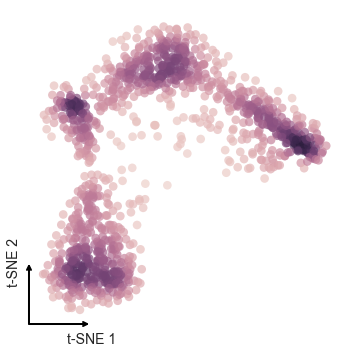

CPU times: user 35.5 s, sys: 1.51 s, total: 37 s
Wall time: 8min 56s


In [45]:
%%time 
qi_tSNE_200 = fcc_tSNE(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_tSNE_200.plot()

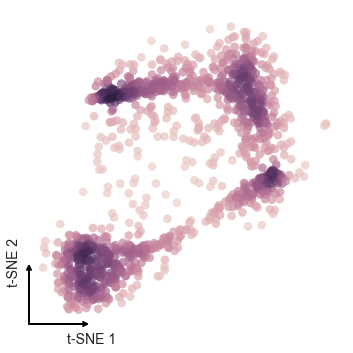

CPU times: user 37.4 s, sys: 1.88 s, total: 39.3 s
Wall time: 59.7 s


In [46]:
%%time 
qi_tSNE_500 = fcc_tSNE(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_tSNE_500.plot()

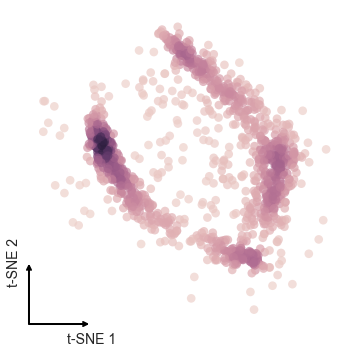

CPU times: user 34.6 s, sys: 2.2 s, total: 36.8 s
Wall time: 2min 16s


In [47]:
%%time 
qi_tSNE_1000 = fcc_tSNE(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_tSNE_1000.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.8145
EMD: 0.2069
KLD: 0.0538
Knn Pres.: 96.6557
CPU times: user 26.3 s, sys: 4.39 s, total: 30.7 s
Wall time: 30.5 s


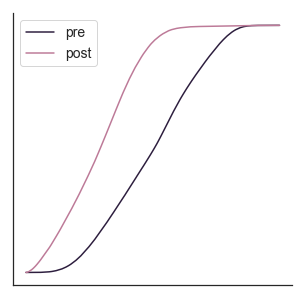

<Figure size 504x504 with 0 Axes>

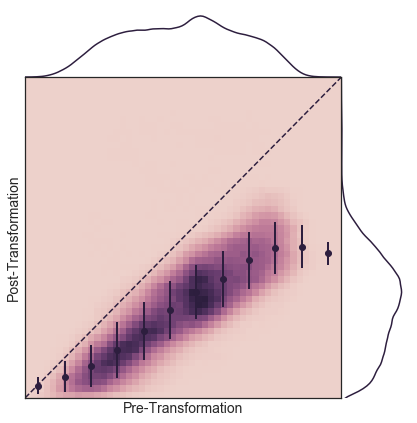

In [48]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_05.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_05.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 5'] = 5
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 5'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 5'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.879
EMD: 0.0702
KLD: 0.0462
Knn Pres.: 96.8728
CPU times: user 23.6 s, sys: 3.49 s, total: 27.1 s
Wall time: 27.6 s


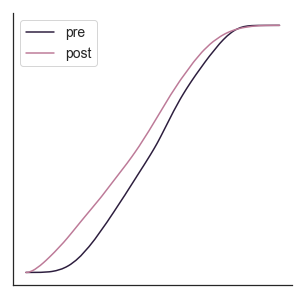

<Figure size 504x504 with 0 Axes>

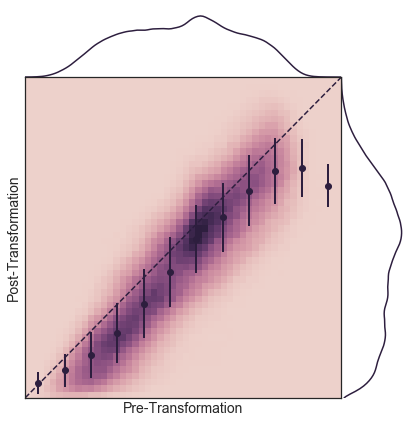

In [49]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_10.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_10.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 10'] = 10
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 10'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 10'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.8816
EMD: 0.0822
KLD: 0.0516
Knn Pres.: 97.1733
CPU times: user 25 s, sys: 4.66 s, total: 29.7 s
Wall time: 29.7 s


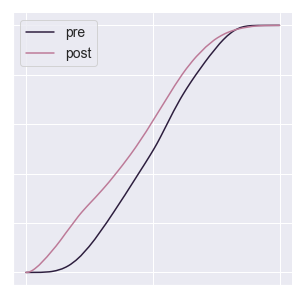

<Figure size 504x504 with 0 Axes>

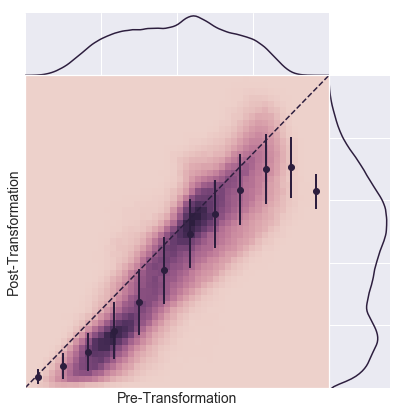

In [87]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_30.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_30.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 30'] = 30
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 30'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 30'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.8273
EMD: 0.0696
KLD: 0.0703
Knn Pres.: 97.4133
CPU times: user 24.6 s, sys: 3.89 s, total: 28.5 s
Wall time: 29 s


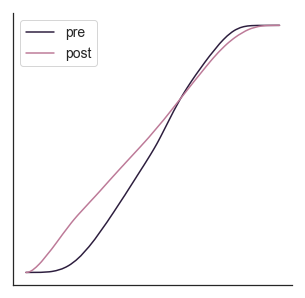

<Figure size 504x504 with 0 Axes>

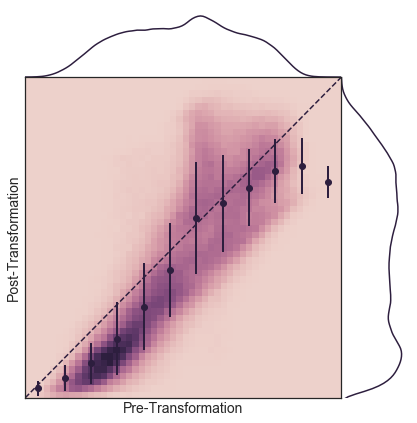

In [51]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_70.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_70.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 70'] = 70
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 70'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 70'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.8407
EMD: 0.0741
KLD: 0.068
Knn Pres.: 97.5454
CPU times: user 24.5 s, sys: 3.73 s, total: 28.2 s
Wall time: 28.2 s


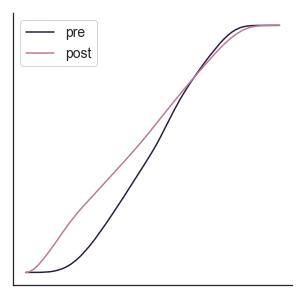

<Figure size 504x504 with 0 Axes>

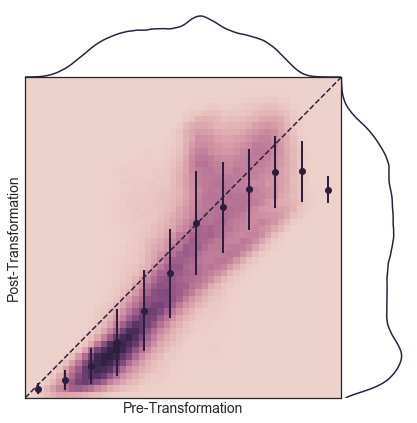

In [52]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_100.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_100.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 100'] = 100
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 100'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 100'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.878
EMD: 0.0866
KLD: 0.0608
Knn Pres.: 97.7818
CPU times: user 24.3 s, sys: 3.12 s, total: 27.4 s
Wall time: 27.3 s


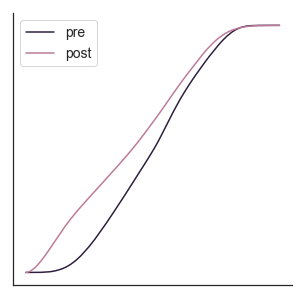

<Figure size 504x504 with 0 Axes>

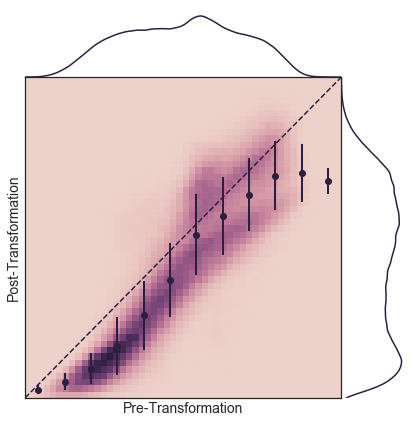

In [53]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_200.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_200.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 200'] = 200
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 200'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 200'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.944
EMD: 0.1111
KLD: 0.0446
Knn Pres.: 98.0805
CPU times: user 23.7 s, sys: 3.53 s, total: 27.2 s
Wall time: 27 s


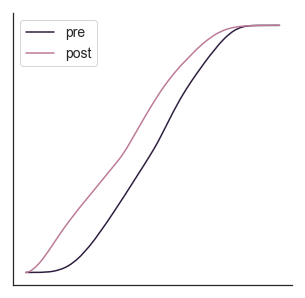

<Figure size 504x504 with 0 Axes>

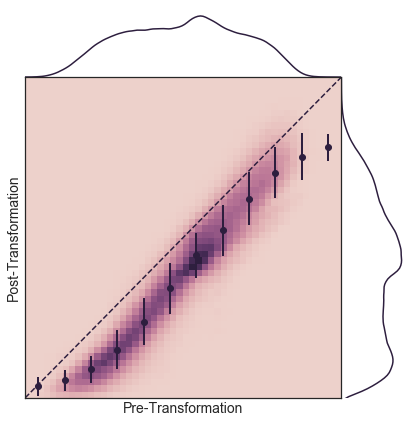

In [54]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_500.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 500'] = 500
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 500'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 500'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.9512
EMD: 0.151
KLD: 0.0422
Knn Pres.: 98.248
CPU times: user 24.2 s, sys: 3.57 s, total: 27.8 s
Wall time: 28.1 s


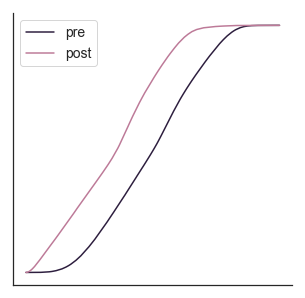

<Figure size 504x504 with 0 Axes>

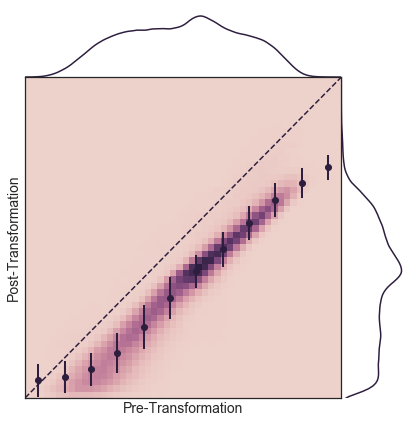

In [55]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_tSNE_1000.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_tSNE_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['t-SNE']['Colon']['Perplexity']['t-SNE 1000'] = 1000
final_distance_stats['t-SNE']['Colon']['R']['t-SNE 1000'], final_distance_stats['t-SNE']['Colon']['EMD']['t-SNE 1000'], final_distance_stats['t-SNE']['Colon']['Knn Pres.']['t-SNE 1000'] = mantel_stats[0], EMD, KLD, knn

---
Now do the same thing with UMAP

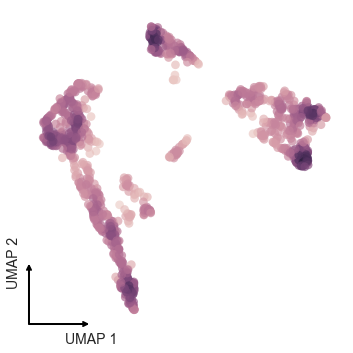

CPU times: user 3.11 s, sys: 282 ms, total: 3.39 s
Wall time: 2.93 s


In [56]:
%%time 
qi_UMAP_05 = fcc_UMAP(qi.arcsinh_norm(), perplexity=5, seed=18) 
qi_UMAP_05.plot()

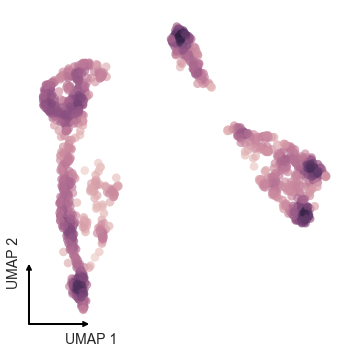

CPU times: user 3.7 s, sys: 309 ms, total: 4.01 s
Wall time: 3.52 s


In [57]:
%%time 
qi_UMAP_10 = fcc_UMAP(qi.arcsinh_norm(), perplexity=10, seed=18) 
qi_UMAP_10.plot()

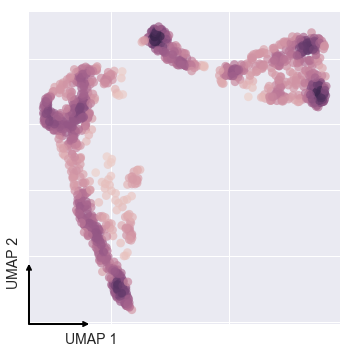

CPU times: user 5.13 s, sys: 292 ms, total: 5.42 s
Wall time: 4.94 s


In [86]:
%%time 
qi_UMAP_30 = fcc_UMAP(qi.arcsinh_norm(), perplexity=30, seed=1)
qi_UMAP_30.plot()

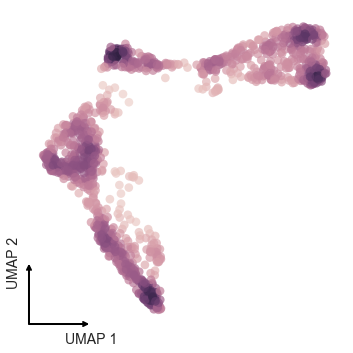

CPU times: user 6.31 s, sys: 286 ms, total: 6.6 s
Wall time: 6.08 s


In [59]:
%%time 
qi_UMAP_70 = fcc_UMAP(qi.arcsinh_norm(), perplexity=70, seed=18) 
qi_UMAP_70.plot()

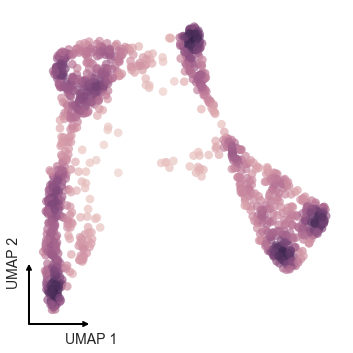

CPU times: user 6.86 s, sys: 290 ms, total: 7.15 s
Wall time: 6.63 s


In [60]:
%%time 
qi_UMAP_100 = fcc_UMAP(qi.arcsinh_norm(), perplexity=100, seed=18) 
qi_UMAP_100.plot()

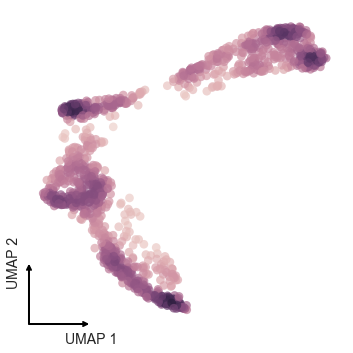

CPU times: user 7.98 s, sys: 315 ms, total: 8.3 s
Wall time: 7.78 s


In [61]:
%%time 
qi_UMAP_200 = fcc_UMAP(qi.arcsinh_norm(), perplexity=200, seed=18) 
qi_UMAP_200.plot()

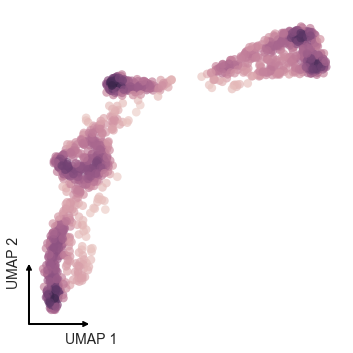

CPU times: user 9.37 s, sys: 329 ms, total: 9.7 s
Wall time: 9.16 s


In [62]:
%%time 
qi_UMAP_500 = fcc_UMAP(qi.arcsinh_norm(), perplexity=500, seed=18) 
qi_UMAP_500.plot()

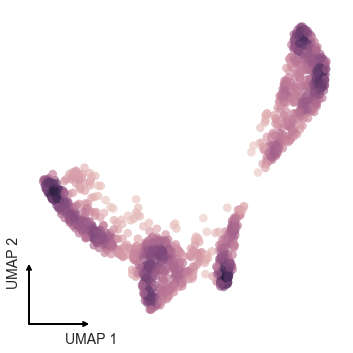

CPU times: user 10.8 s, sys: 422 ms, total: 11.2 s
Wall time: 10.7 s


In [63]:
%%time 
qi_UMAP_1000 = fcc_UMAP(qi.arcsinh_norm(), perplexity=1000, seed=18) 
qi_UMAP_1000.plot()

---
#### Compare Euclidean distances and Knn preservation before and after DR transformations
* _arcsinh-transform counts_ before calculating distance matrices for fair comparison to DR outputs

R: 0.844
EMD: 0.0765
KLD: 0.0891
Knn Pres.: 96.8737
CPU times: user 24.9 s, sys: 4.79 s, total: 29.7 s
Wall time: 30.1 s


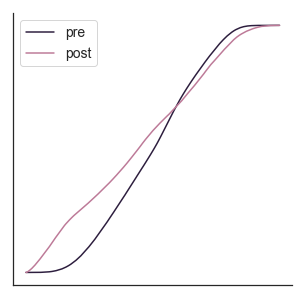

<Figure size 504x504 with 0 Axes>

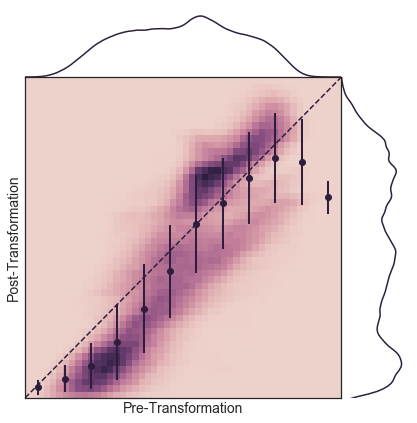

In [64]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_05.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_05.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 5'] = 5
final_distance_stats['UMAP']['Colon']['R']['UMAP 5'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 5'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 5'] = mantel_stats[0], EMD, KLD, knn

R: 0.8117
EMD: 0.0899
KLD: 0.1057
Knn Pres.: 97.0243
CPU times: user 24.8 s, sys: 4.21 s, total: 29 s
Wall time: 29.7 s


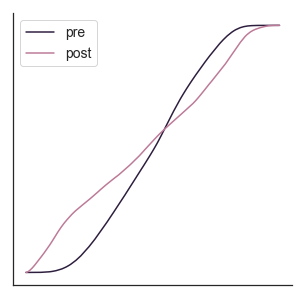

<Figure size 504x504 with 0 Axes>

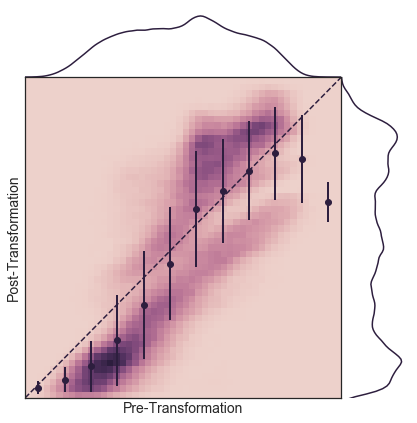

In [65]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_10.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_10.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 10'] = 10
final_distance_stats['UMAP']['Colon']['R']['UMAP 10'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 10'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 10'] = mantel_stats[0], EMD, KLD, knn

R: 0.8002
EMD: 0.0936
KLD: 0.0998
Knn Pres.: 97.1171
CPU times: user 23.7 s, sys: 3.65 s, total: 27.3 s
Wall time: 27.2 s


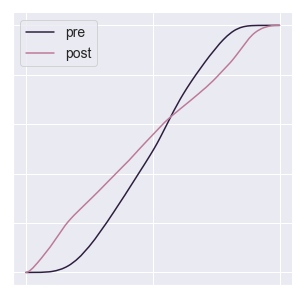

<Figure size 504x504 with 0 Axes>

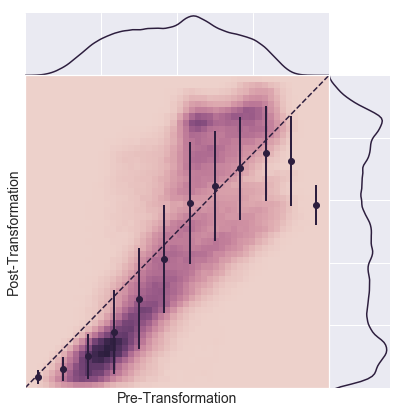

In [88]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_30.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_30.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 30'] = 30
final_distance_stats['UMAP']['Colon']['R']['UMAP 30'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 30'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 30'] = mantel_stats[0], EMD, KLD, knn

R: 0.7968
EMD: 0.0809
KLD: 0.0939
Knn Pres.: 97.118
CPU times: user 23.5 s, sys: 3.59 s, total: 27.1 s
Wall time: 26.9 s


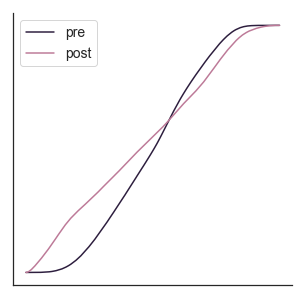

<Figure size 504x504 with 0 Axes>

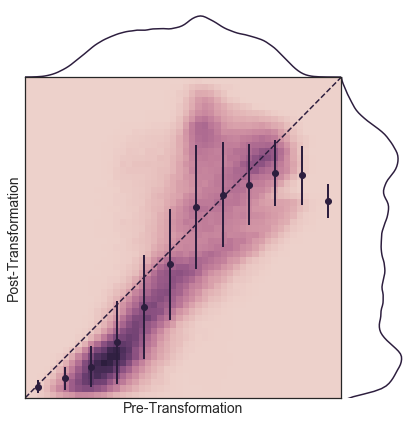

In [67]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_70.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_70.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 70'] = 70
final_distance_stats['UMAP']['Colon']['R']['UMAP 70'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 70'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 70'] = mantel_stats[0], EMD, KLD, knn

R: 0.8499
EMD: 0.0745
KLD: 0.0751
Knn Pres.: 97.0711
CPU times: user 23.6 s, sys: 3.52 s, total: 27.1 s
Wall time: 26.9 s


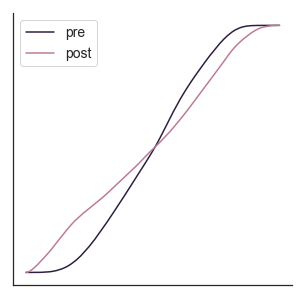

<Figure size 504x504 with 0 Axes>

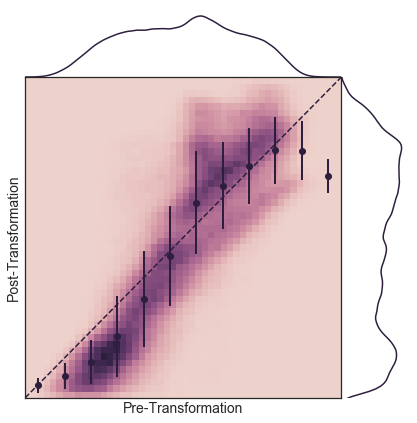

In [68]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_100.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_100.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 100'] = 100
final_distance_stats['UMAP']['Colon']['R']['UMAP 100'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 100'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 100'] = mantel_stats[0], EMD, KLD, knn

R: 0.7424
EMD: 0.0952
KLD: 0.1169
Knn Pres.: 97.0658
CPU times: user 24.3 s, sys: 3.75 s, total: 28 s
Wall time: 28.9 s


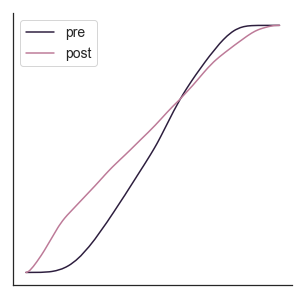

<Figure size 504x504 with 0 Axes>

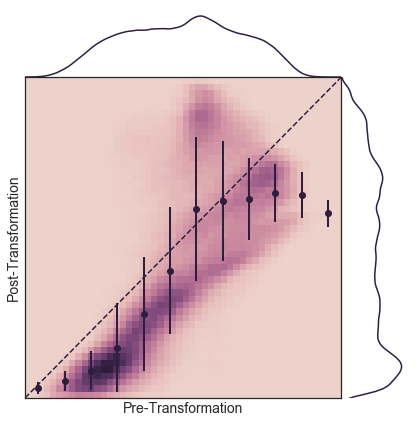

In [69]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_200.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_200.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 200'] = 200
final_distance_stats['UMAP']['Colon']['R']['UMAP 200'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 200'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 200'] = mantel_stats[0], EMD, KLD, knn

R: 0.7075
EMD: 0.1174
KLD: 0.1344
Knn Pres.: 97.0214
CPU times: user 23.5 s, sys: 3.6 s, total: 27.1 s
Wall time: 27 s


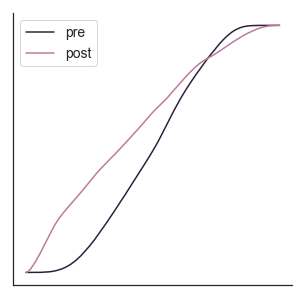

<Figure size 504x504 with 0 Axes>

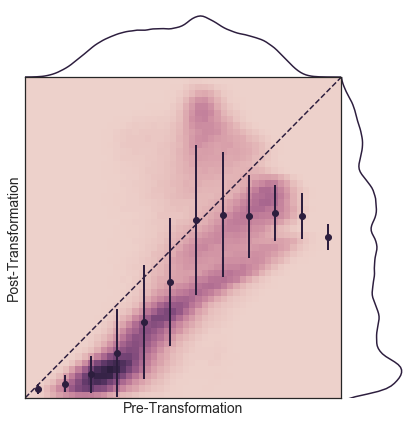

In [70]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_500.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_500.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 500'] = 500
final_distance_stats['UMAP']['Colon']['R']['UMAP 500'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 500'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 500'] = mantel_stats[0], EMD, KLD, knn

R: 0.7146
EMD: 0.1141
KLD: 0.1343
Knn Pres.: 97.0398
CPU times: user 23.5 s, sys: 3.59 s, total: 27 s
Wall time: 26.9 s


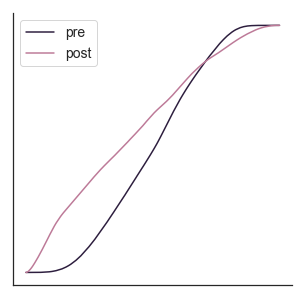

<Figure size 504x504 with 0 Axes>

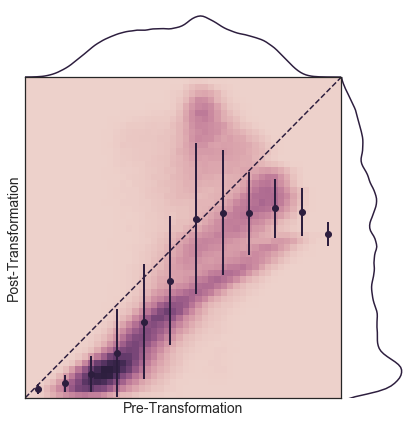

In [71]:
%%time 
pre_flat_norm, post_flat_norm, mantel_stats, EMD = distance_stats(pre=qi.distance_matrix(transform='arcsinh'), post=qi_UMAP_1000.distance_matrix())
knn = knn_preservation(pre=qi.knn_graph(k, transform='arcsinh'), post=qi_UMAP_1000.knn_graph(k))
print('R: {}\nEMD: {}\nKnn Pres.: {}'.format(round(mantel_stats[0],4), round(EMD,4), round(knn, 4)))

plt.figure(figsize=(5,5))
plot_cumulative_distributions(pre_flat_norm, post_flat_norm)
plt.figure(figsize=(7,7))
joint_plot_distance_correlation(pre_flat_norm, post_flat_norm)

# dump outputs into dictionary
final_distance_stats['UMAP']['Colon']['Perplexity']['UMAP 1000'] = 1000
final_distance_stats['UMAP']['Colon']['R']['UMAP 1000'], final_distance_stats['UMAP']['Colon']['EMD']['UMAP 1000'], final_distance_stats['UMAP']['Colon']['Knn Pres.']['UMAP 1000'] = mantel_stats[0], EMD, KLD, knn

---
### Aggregate summary metrics

In [72]:
retina_tSNE_sum = pd.DataFrame(final_distance_stats['t-SNE']['Retina'])
retina_tSNE_sum = retina_tSNE_sum.sort_values(by='Perplexity')
retina_tSNE_sum = retina_tSNE_sum.reindex(['Perplexity','EMD','R','Knn Pres.'], axis=1)

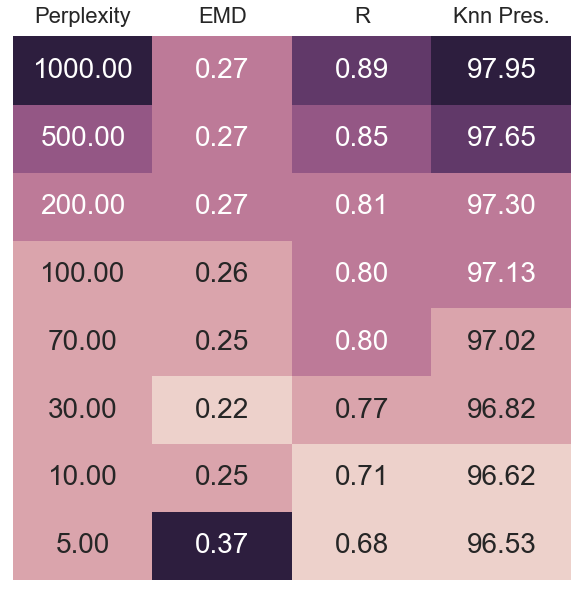

In [98]:
retina_norm=(retina_tSNE_sum-retina_tSNE_sum.mean())/retina_tSNE_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_tSNE_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False, yticklabels=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.show()

In [75]:
retina_UMAP_sum = pd.DataFrame(final_distance_stats['UMAP']['Retina'])
retina_UMAP_sum = retina_UMAP_sum.sort_values(by='Perplexity')
retina_UMAP_sum = retina_UMAP_sum.reindex(['Perplexity','EMD','R','Knn Pres.'], axis=1)

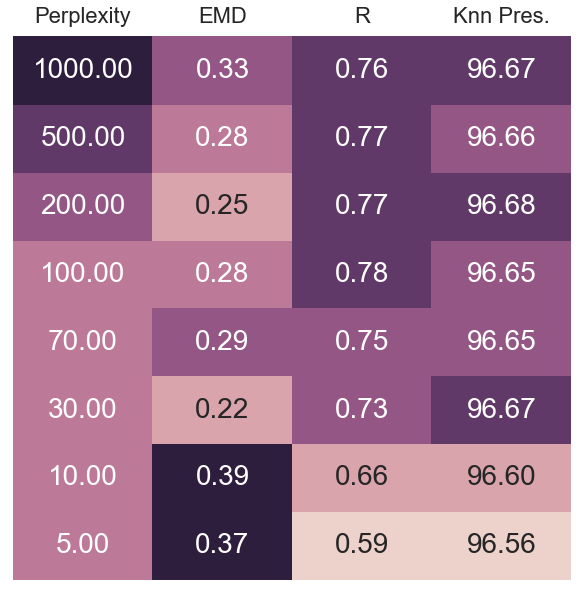

In [97]:
retina_norm=(retina_UMAP_sum-retina_UMAP_sum.mean())/retina_UMAP_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(retina_norm, annot=retina_UMAP_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False, yticklabels=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.show()

In [89]:
colon_tSNE_sum = pd.DataFrame(final_distance_stats['t-SNE']['Colon'])
colon_tSNE_sum = colon_tSNE_sum.sort_values(by='Perplexity')
colon_tSNE_sum = colon_tSNE_sum.reindex(['Perplexity','EMD','KLD','R','Knn Pres.'], axis=1)
colon_tSNE_sum.to_csv('colon_tSNE_perplexity.csv')

In [90]:
colon_tSNE_sum = colon_tSNE_sum.drop('KLD', axis=1) # dropping KL divergence

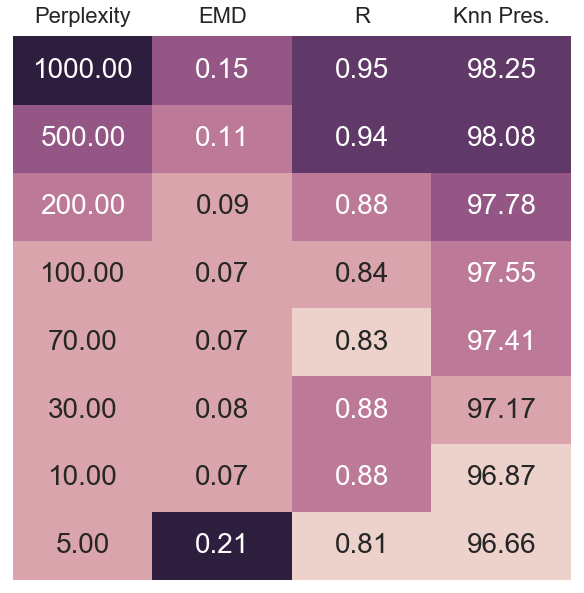

In [96]:
colon_norm=(colon_tSNE_sum-colon_tSNE_sum.mean())/colon_tSNE_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_tSNE_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False, yticklabels=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.savefig(fname='../images/colon_tSNE_perplexity.png', transparent=True, bbox_inches='tight')

In [92]:
colon_UMAP_sum = pd.DataFrame(final_distance_stats['UMAP']['Colon'])
colon_UMAP_sum = colon_UMAP_sum.sort_values(by='Perplexity')
colon_UMAP_sum = colon_UMAP_sum.reindex(['Perplexity','EMD','R','Knn Pres.'], axis=1)

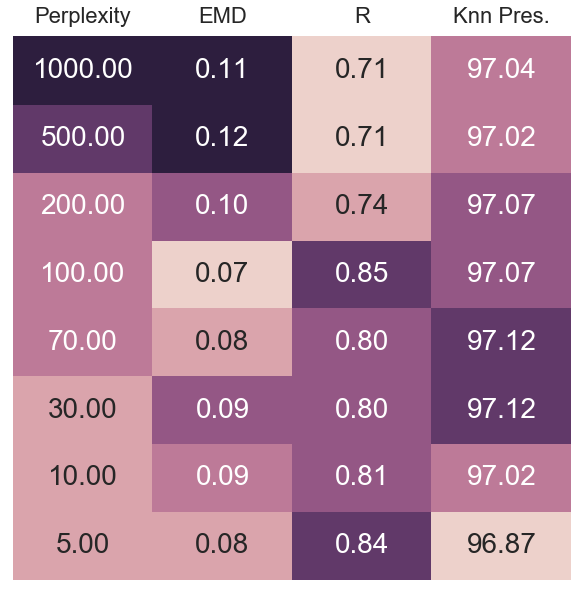

In [95]:
colon_norm=(colon_UMAP_sum-colon_UMAP_sum.mean())/colon_UMAP_sum.std()
sns.set(font_scale=2)
plt.figure(figsize=(10,10))
ax = sns.heatmap(colon_norm, annot=colon_UMAP_sum, cmap=sns.cubehelix_palette(), robust=True, annot_kws={"size": 28}, fmt='.2f', cbar=False, yticklabels=False)
ax.invert_yaxis()
ax.xaxis.tick_top()
ax.tick_params(top=False)
plt.show()